# Round 1

We want to find the optimal step size for the 2-D bier model. Compare both derivatives and integrated dynamics.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import timeit

Now we are ready to create the training dataset by integrating the above system of equations to obtain the measurements. We also introduce a Gaussian noise to the dataset.

In [6]:
# compute the error for every time step (integrated dynamics)
error_dict = {}

for key, value in bier.items():
    data = value['data']
    pred = value['pred']
    time_points = value['t']
    
    #normalized L2-norm
    error_x = np.linalg.norm(data[:,0] - pred[:,0], 2)/np.linalg.norm(data[:,0], 2)
    error_y = np.linalg.norm(data[:,1] - pred[:,1], 2)/np.linalg.norm(data[:,1], 2)
    
    error_dict[key] = (error_x, error_y)
    
error_dict

{0.6: (0.9768508220511088, 0.547733435894505),
 0.2: (135.58453594152604, 100.4208740798013),
 0.1: (109.98388521708097, 60.32595779919513),
 0.05: (1.0027781010897578, 0.5528010235891208),
 0.02: (15.83493192837429, 11.522523744399486),
 0.01: (1.0821839361590468, 0.6036484738444193),
 0.005: (107.23220208861844, 83.82718128745809),
 0.001: (0.9148050086822698, 0.594999099022972)}

In [15]:
# compute the error for every time step (derivatives)
# pred1 version -- using ground truth as input
error1_dict = {}

for key, value in bier.items():
    data = np.array(value['f_data'])
    pred = np.array(value['f_pred1'])
    time_points = value['t']
    
    #normalized L2-norm
    error_x = np.linalg.norm(data[:,0] - pred[:,0], 2)/np.linalg.norm(data[:,0], 2)
    error_y = np.linalg.norm(data[:,1] - pred[:,1], 2)/np.linalg.norm(data[:,1], 2)
    
    error1_dict[key] = (error_x, error_y)
    
error1_dict

{0.6: (0.024522923156888293, 0.009751613055922904),
 0.2: (0.016051887936550473, 0.009675217464687665),
 0.1: (0.018330348350603706, 0.012141031543368968),
 0.05: (0.014716019013490584, 0.00923387217662809),
 0.02: (0.015313531059687026, 0.010769690595779507),
 0.01: (0.016316589715320642, 0.011007261180989245),
 0.005: (0.02070119610011944, 0.014548104931231121),
 0.001: (0.026327184797684738, 0.01652694953719881)}

In [16]:
# compute the error for every time step (derivatives)
# pred2 version -- using predictions as input
error2_dict = {}

for key, value in bier.items():
    data = np.array(value['f_data'])
    pred = np.array(value['f_pred2'])
    time_points = value['t']
    
    #normalized L2-norm
    error_x = np.linalg.norm(data[:,0] - pred[:,0], 2)/np.linalg.norm(data[:,0], 2)
    error_y = np.linalg.norm(data[:,1] - pred[:,1], 2)/np.linalg.norm(data[:,1], 2)
    
    error2_dict[key] = (error_x, error_y)
    
error2_dict

{0.6: (1.1089893302261586, 1.1597932791094219),
 0.2: (3.5863524292446796, 7.32708250750499),
 0.1: (2.8441608879989424, 4.327950214259909),
 0.05: (1.1521660113359684, 1.1960507103974443),
 0.02: (1.646135028992749, 2.4402798440065974),
 0.01: (1.2495550584478532, 1.2941229590829166),
 0.005: (2.802799115965341, 6.005497946518887),
 0.001: (1.015039924118619, 1.0378004866610187)}

# Round 2

Here we have regular time steps, and plot the time courses. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import timeit

In [2]:
start_time = timeit.default_timer()
with open('bier.pkl', 'rb') as file:
    bier = pickle.load(file)
elapsed_time = timeit.default_timer() - start_time
print(elapsed_time)
bier.keys()

0.09803860200008785


dict_keys([0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2])

In [3]:
# compute the error for every time step (integrated dynamics)
error_dict = {}

for key, value in bier.items():
    data = value['data']
    pred = value['pred']
    time_points = value['t']
    
    #normalized L2-norm
    error_x = np.linalg.norm(data[:,0] - pred[:,0], 2)/np.linalg.norm(data[:,0], 2)
    error_y = np.linalg.norm(data[:,1] - pred[:,1], 2)/np.linalg.norm(data[:,1], 2)
    
    error_dict[key] = (error_x, error_y)
    
error_dict

{0.3: (1.0204092533622835, 0.5746058967069932),
 0.4: (1.066193035928398, 0.5894063619728356),
 0.5: (1.0188178816290374, 0.5573729649634099),
 0.6: (157.82905947452434, 106.7797606944133),
 0.7: (97.00578107293195, 69.79951745922924),
 0.8: (47.22208515056069, 32.84596846413),
 0.9: (1.083985005502759, 0.6024128848879152),
 1.0: (1.076594827462046, 0.5765250663334175),
 1.1: (1.0374572779957607, 0.5651059442459004),
 1.2: (1.069381027690791, 0.6003401973196739)}

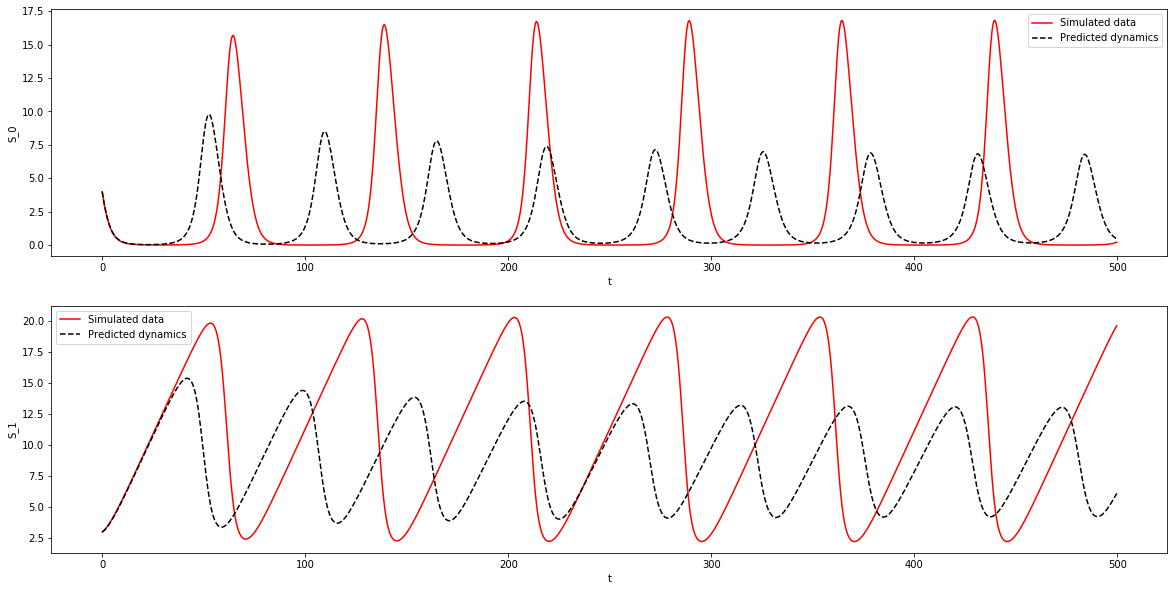

In [4]:
value = bier[0.3]
simulated_x = value['data']
test_pred = value['pred']
time_points = value['t']

plt.figure(figsize=(20, 10))

for species in range(2):
    plt.subplot(2,1,species + 1)
    plt.plot(time_points, simulated_x[:, species], 'r-', label='Simulated data')
    plt.plot(time_points, test_pred[:,species], 'k--', label='Predicted dynamics')
    plt.xlabel('t')
    plt.ylabel('S_' + str(species))
    plt.legend()
    
#plt.title('Trajectories of 2D Yeast Glycolysis')

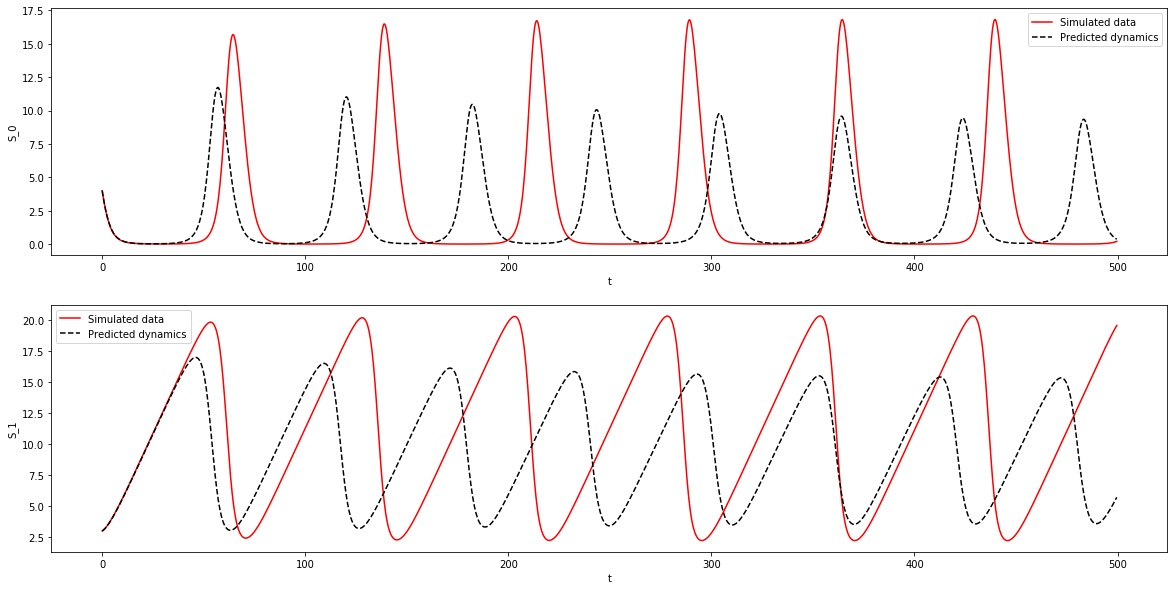

In [5]:
value = bier[0.4]
simulated_x = value['data']
test_pred = value['pred']
time_points = value['t']

plt.figure(figsize=(20, 10))

for species in range(2):
    plt.subplot(2,1,species + 1)
    plt.plot(time_points, simulated_x[:, species], 'r-', label='Simulated data')
    plt.plot(time_points, test_pred[:,species], 'k--', label='Predicted dynamics')
    plt.xlabel('t')
    plt.ylabel('S_' + str(species))
    plt.legend()
    
#plt.title('Trajectories of 2D Yeast Glycolysis')

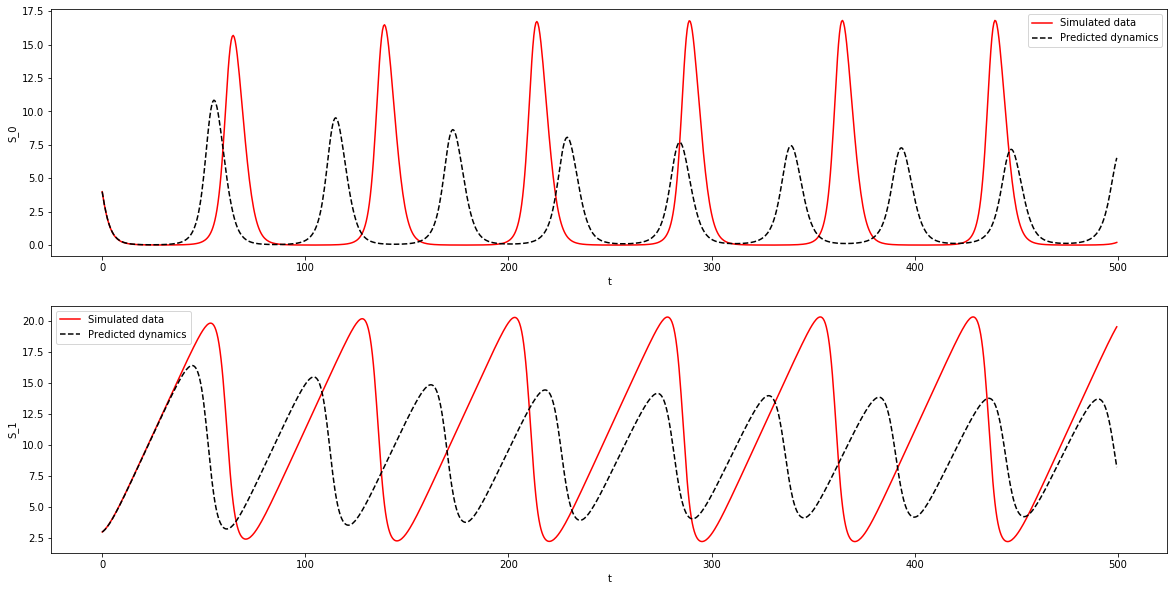

In [6]:
value = bier[0.5]
simulated_x = value['data']
test_pred = value['pred']
time_points = value['t']

plt.figure(figsize=(20, 10))

for species in range(2):
    plt.subplot(2,1,species + 1)
    plt.plot(time_points, simulated_x[:, species], 'r-', label='Simulated data')
    plt.plot(time_points, test_pred[:,species], 'k--', label='Predicted dynamics')
    plt.xlabel('t')
    plt.ylabel('S_' + str(species))
    plt.legend()
    
#plt.title('Trajectories of 2D Yeast Glycolysis')

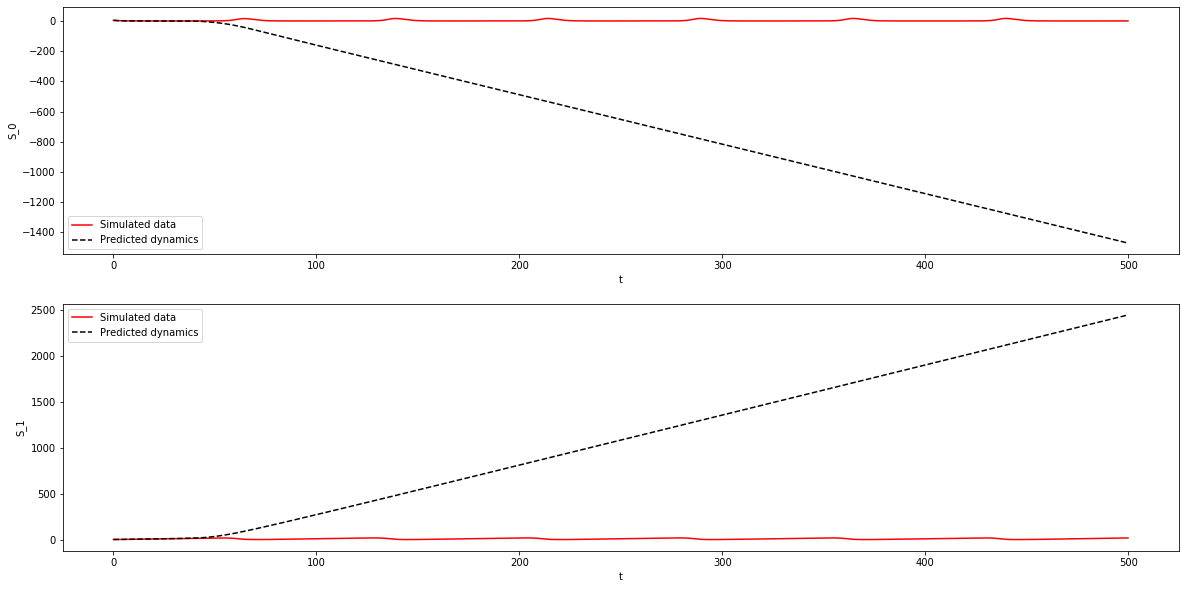

In [7]:
value = bier[0.6]
simulated_x = value['data']
test_pred = value['pred']
time_points = value['t']

plt.figure(figsize=(20, 10))

for species in range(2):
    plt.subplot(2,1,species + 1)
    plt.plot(time_points, simulated_x[:, species], 'r-', label='Simulated data')
    plt.plot(time_points, test_pred[:,species], 'k--', label='Predicted dynamics')
    plt.xlabel('t')
    plt.ylabel('S_' + str(species))
    plt.legend()
    
#plt.title('Trajectories of 2D Yeast Glycolysis')

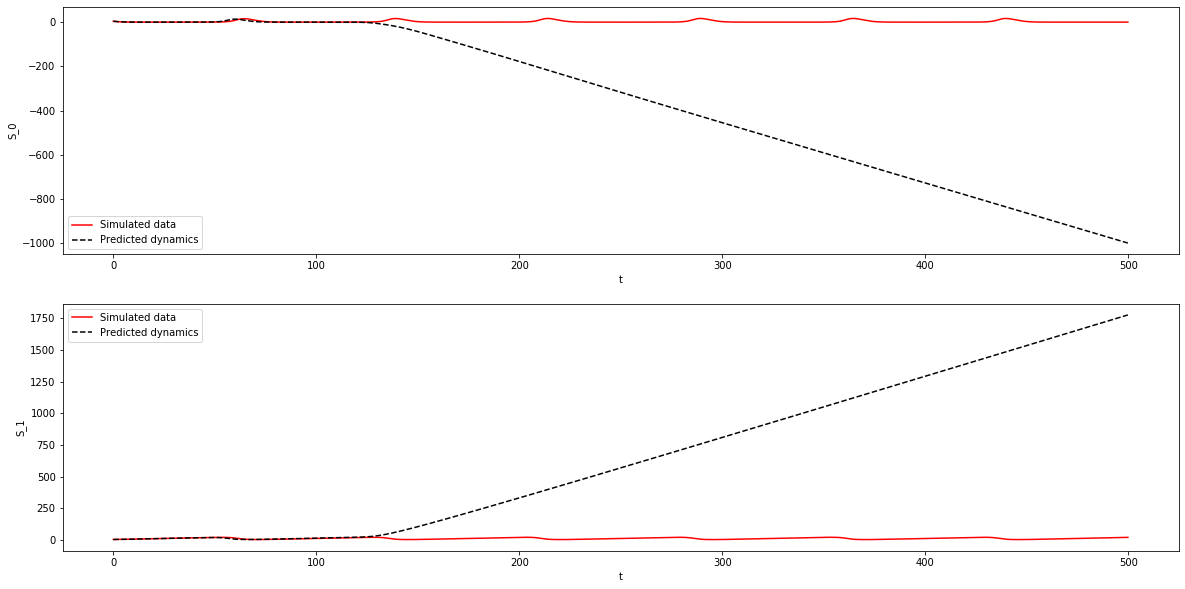

In [8]:
value = bier[0.7]
simulated_x = value['data']
test_pred = value['pred']
time_points = value['t']

plt.figure(figsize=(20, 10))

for species in range(2):
    plt.subplot(2,1,species + 1)
    plt.plot(time_points, simulated_x[:, species], 'r-', label='Simulated data')
    plt.plot(time_points, test_pred[:,species], 'k--', label='Predicted dynamics')
    plt.xlabel('t')
    plt.ylabel('S_' + str(species))
    plt.legend()
    
#plt.title('Trajectories of 2D Yeast Glycolysis')

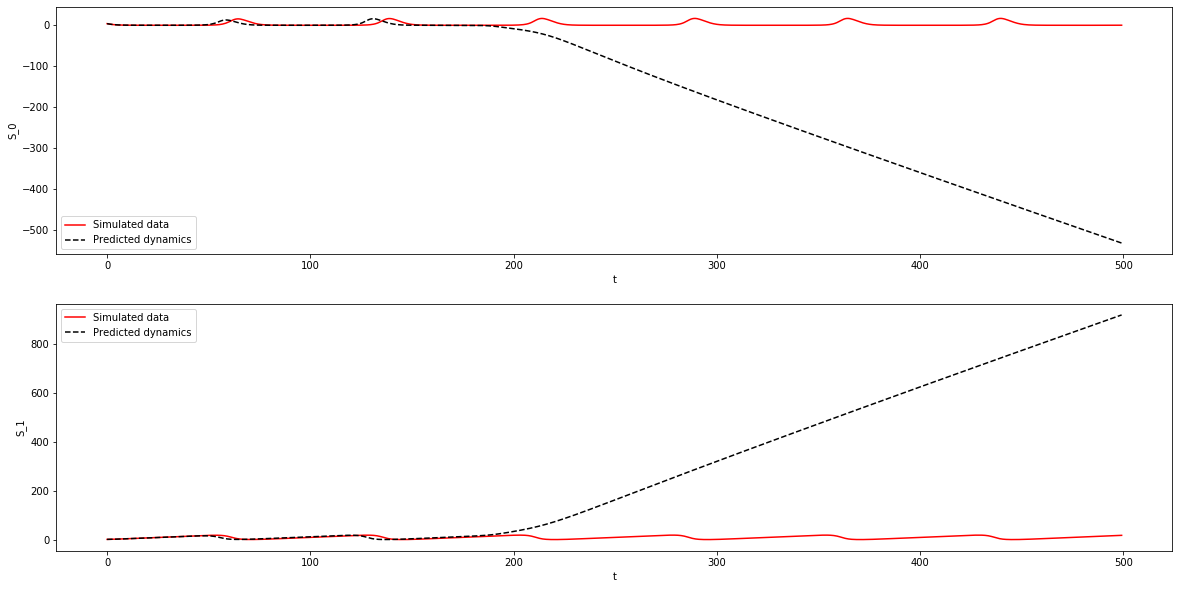

In [9]:
value = bier[0.8]
simulated_x = value['data']
test_pred = value['pred']
time_points = value['t']

plt.figure(figsize=(20, 10))

for species in range(2):
    plt.subplot(2,1,species + 1)
    plt.plot(time_points, simulated_x[:, species], 'r-', label='Simulated data')
    plt.plot(time_points, test_pred[:,species], 'k--', label='Predicted dynamics')
    plt.xlabel('t')
    plt.ylabel('S_' + str(species))
    plt.legend()
    
#plt.title('Trajectories of 2D Yeast Glycolysis')

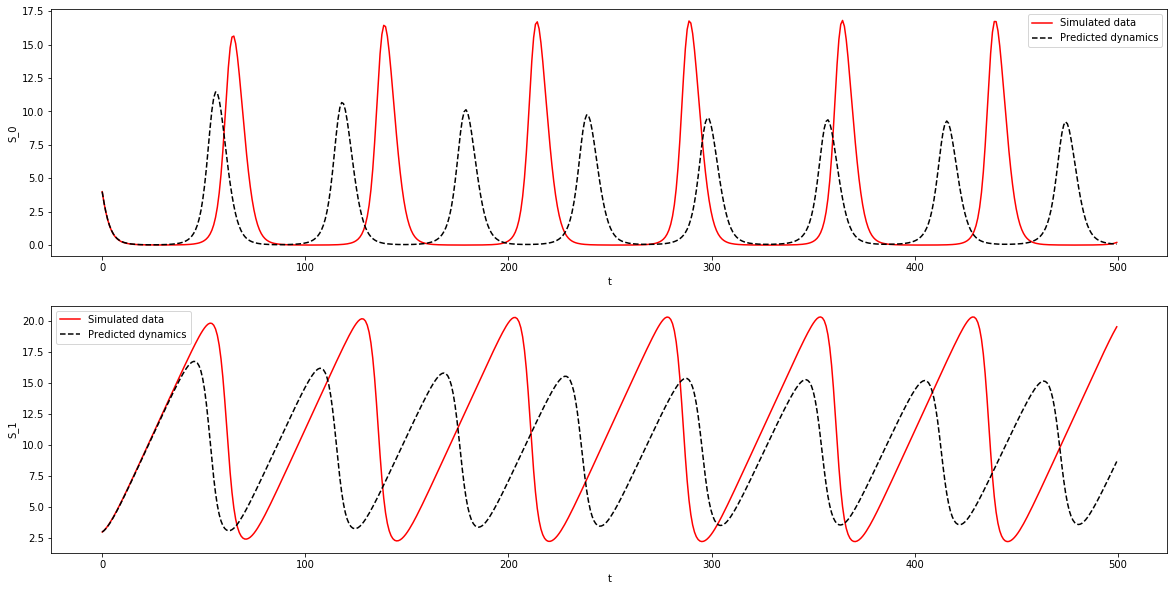

In [10]:
value = bier[0.9]
simulated_x = value['data']
test_pred = value['pred']
time_points = value['t']

plt.figure(figsize=(20, 10))

for species in range(2):
    plt.subplot(2,1,species + 1)
    plt.plot(time_points, simulated_x[:, species], 'r-', label='Simulated data')
    plt.plot(time_points, test_pred[:,species], 'k--', label='Predicted dynamics')
    plt.xlabel('t')
    plt.ylabel('S_' + str(species))
    plt.legend()
    
#plt.title('Trajectories of 2D Yeast Glycolysis')

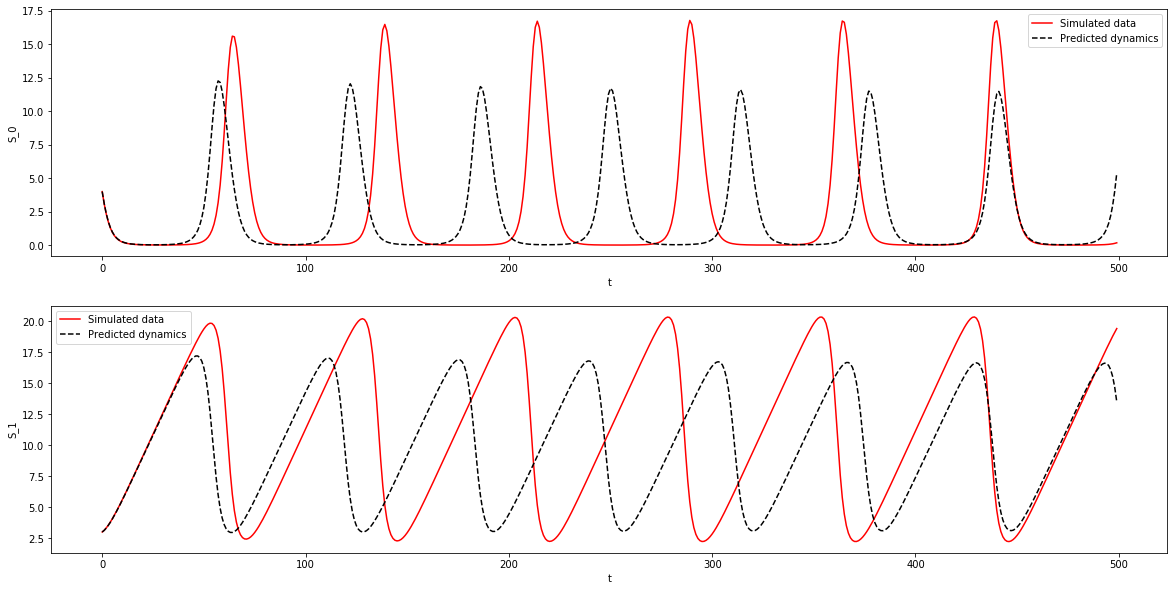

In [11]:
value = bier[1.0]
simulated_x = value['data']
test_pred = value['pred']
time_points = value['t']

plt.figure(figsize=(20, 10))

for species in range(2):
    plt.subplot(2,1,species + 1)
    plt.plot(time_points, simulated_x[:, species], 'r-', label='Simulated data')
    plt.plot(time_points, test_pred[:,species], 'k--', label='Predicted dynamics')
    plt.xlabel('t')
    plt.ylabel('S_' + str(species))
    plt.legend()
    
#plt.title('Trajectories of 2D Yeast Glycolysis')

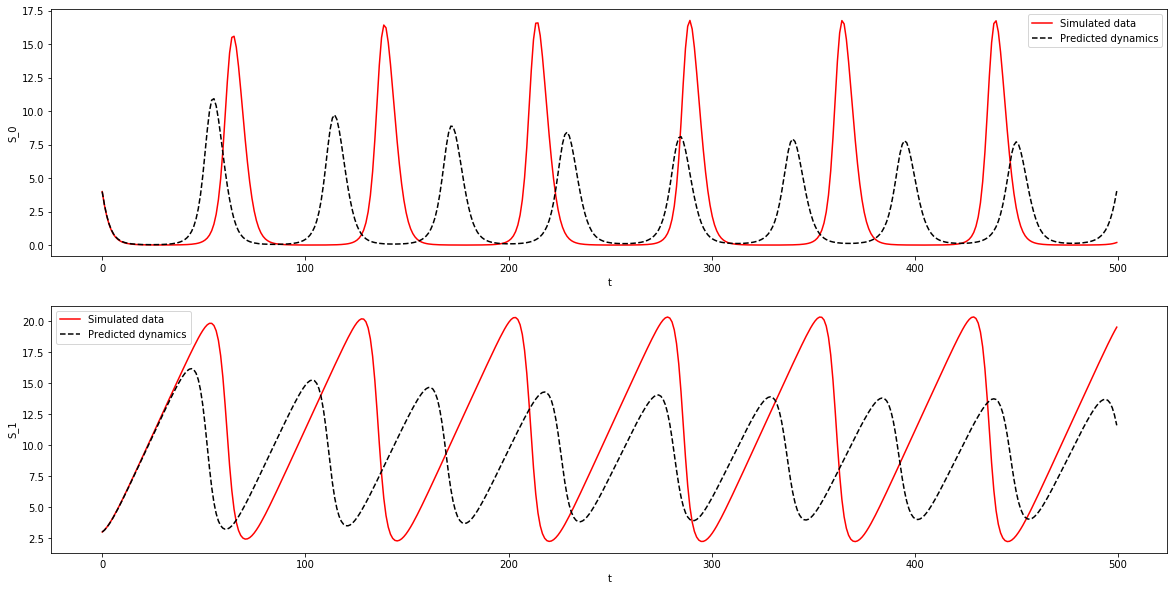

In [12]:
value = bier[1.1]
simulated_x = value['data']
test_pred = value['pred']
time_points = value['t']

plt.figure(figsize=(20, 10))

for species in range(2):
    plt.subplot(2,1,species + 1)
    plt.plot(time_points, simulated_x[:, species], 'r-', label='Simulated data')
    plt.plot(time_points, test_pred[:,species], 'k--', label='Predicted dynamics')
    plt.xlabel('t')
    plt.ylabel('S_' + str(species))
    plt.legend()
    
#plt.title('Trajectories of 2D Yeast Glycolysis')

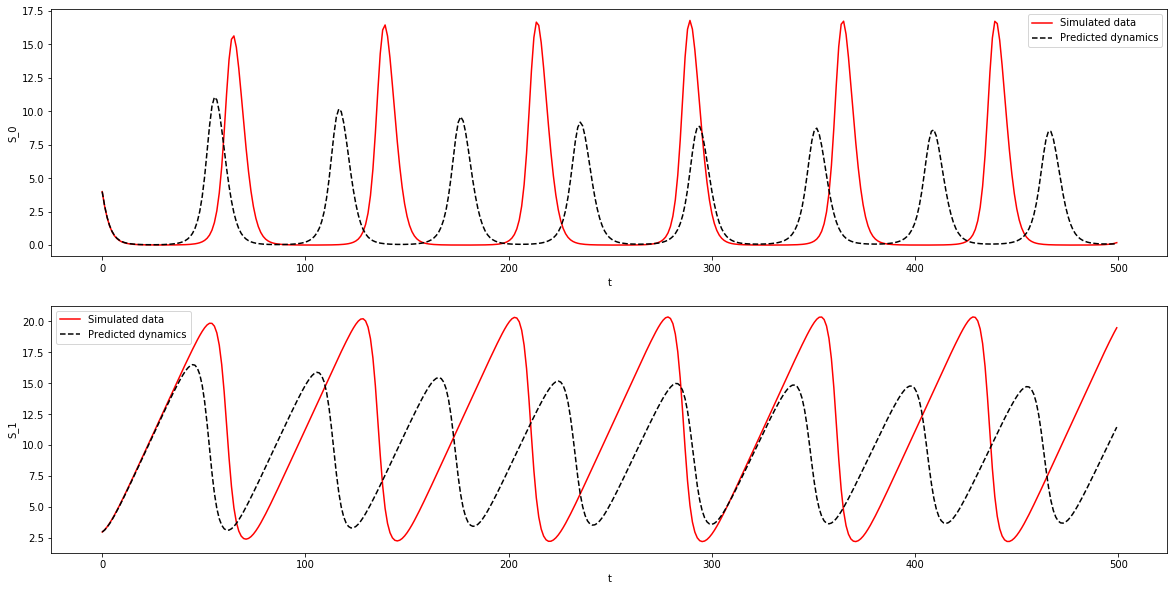

In [13]:
value = bier[1.2]
simulated_x = value['data']
test_pred = value['pred']
time_points = value['t']

plt.figure(figsize=(20, 10))

for species in range(2):
    plt.subplot(2,1,species + 1)
    plt.plot(time_points, simulated_x[:, species], 'r-', label='Simulated data')
    plt.plot(time_points, test_pred[:,species], 'k--', label='Predicted dynamics')
    plt.xlabel('t')
    plt.ylabel('S_' + str(species))
    plt.legend()
    
#plt.title('Trajectories of 2D Yeast Glycolysis')

Text(0.5, 1.0, 'Phase plane of 2D Cubic Harmonic Oscillator')

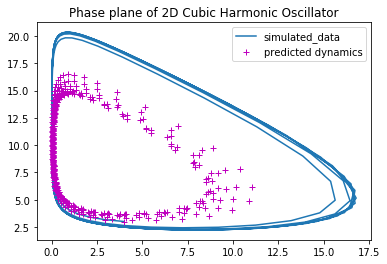

In [15]:
# Phase plane

plt.plot(simulated_x[:,0], simulated_x[:,1], label='simulated_data')
plt.legend()
plt.plot(test_pred[:,0], test_pred[:,1], 'm+', label='predicted dynamics')
plt.legend()
plt.title('Phase plane of 2D Cubic Harmonic Oscillator')